## Start

In [23]:
import os

base_dir = '/home/irium/htdocs/widiarrohman1234.github.io/Artificial_Intelligence/folder_dataset/animal/animal_dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
folders=os.listdir(train_dir)

## Image Data Generator

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
# train_datagen = ImageDataGenerator(
#     rescale=1./255,  # Normalisasi pixel ke rentang [0,1]
#     rotation_range=20,  # Rotasi gambar hingga 20 derajat
#     width_shift_range=0.2,  # Perpindahan horizontal hingga 20%
#     height_shift_range=0.2,  # Perpindahan vertikal hingga 20%
#     shear_range=0.2,  # Transformasi shearing
#     zoom_range=0.2,  # Zoom in/out gambar
#     horizontal_flip=True,  # Membalik gambar secara horizontal
#     fill_mode='nearest'  # Mode pengisian piksel
# )
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=30,
#     horizontal_flip=True,
#     shear_range=0.3,
#     fill_mode='nearest',
#     width_shift_range=0.3,
#     height_shift_range=0.3,
#     zoom_range=0.3,
#     )
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    # shuffle=True
    )
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    # shuffle=False
    )

Found 25 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


## Deep Learning Model

![Deep Learning Model](../image/deep_learning_model.png)

In [35]:
from tensorflow.keras import layers, regularizers, Model
# Bapak
img_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(50, activation='sigmoid')(x)

output = layers.Dense(5, activation='relu')(x)

model = Model(img_input, output)
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['acc'])

# # medium
# img_input = layers.Input(shape=(150, 150, 3))
# x = layers.Conv2D(32, 3, activation='relu', padding='same')(img_input)
# x = layers.BatchNormalization()(x) 
# x = layers.MaxPooling2D(2)(x)

# x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
# x = layers.BatchNormalization()(x)
# x = layers.MaxPooling2D(2)(x)

# x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
# x = layers.BatchNormalization()(x)
# x = layers.MaxPooling2D(2)(x)

# # Dropout untuk regularisasi
# x = layers.Dropout(0.3)(x)

# # Flatten dan Fully Connected Layer
# x = layers.Flatten()(x)
# x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)  # Tambahkan L2 regularizer
# x = layers.Dropout(0.5)(x)

# # Output Layer
# output = layers.Dense(5, activation='softmax')(x)


# model = Model(img_input, output)
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# sendiri
# import tensorflow as tf
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# model = tf.keras.models.Sequential([
#     Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
#     MaxPooling2D(2,2),
#     Conv2D(64,(3,3),activation='relu'),
#     MaxPooling2D(2,2),
#     Conv2D(128,(3,3),activation='relu'),
#     MaxPooling2D(2,2),
#     Conv2D(512,(3,3),activation='relu'),
#     MaxPooling2D(2,2),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(5, activation='softmax') # 5 classes output
# ])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 50)             │     2,073,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,078,993 (7.93 MB)

 Trainable params: 2,078,993 (7.93 MB)

 Non-trainable params: 0 (0.00 B)

## Visualising the model

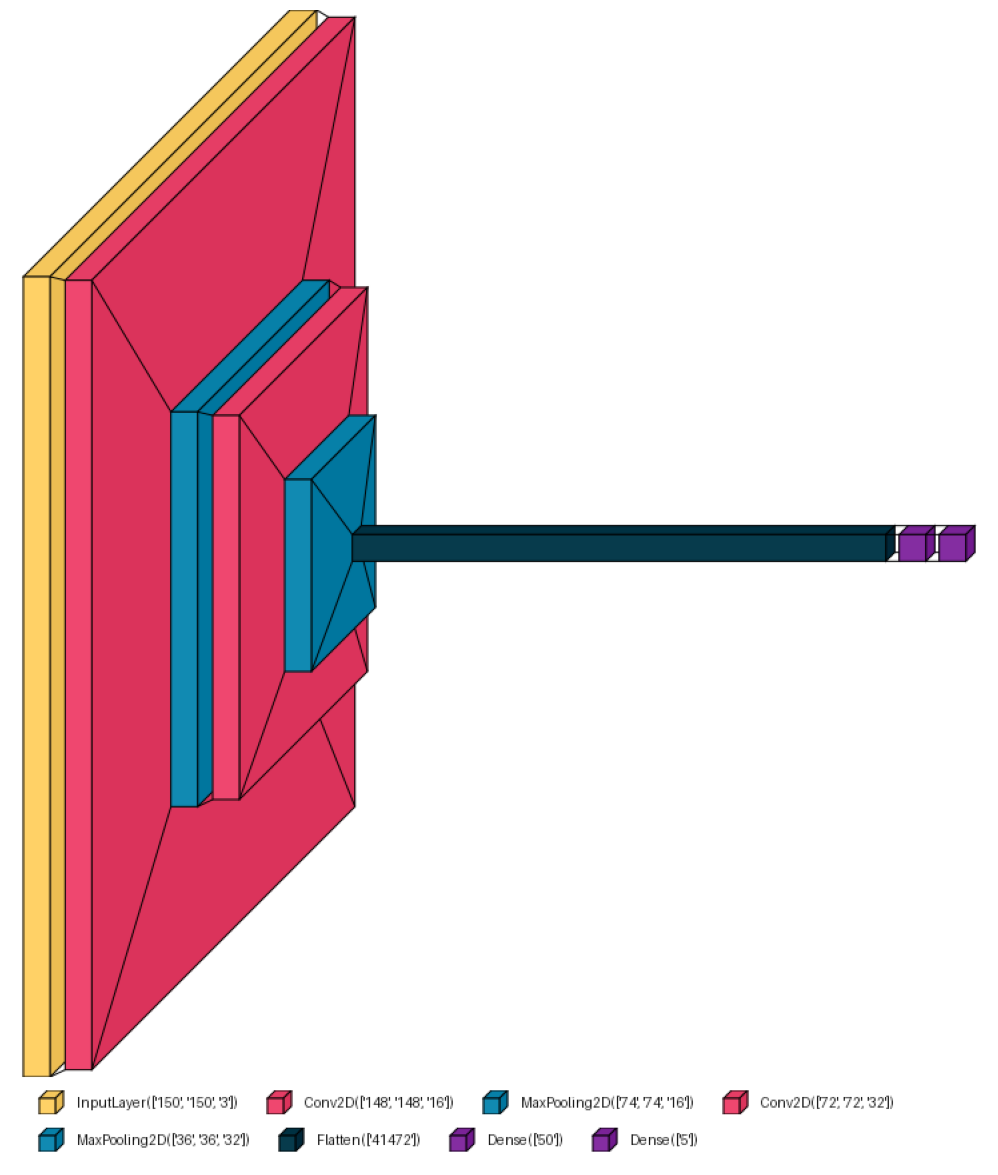

In [36]:
import visualkeras
import matplotlib.pyplot as plt

img_mode = visualkeras.layered_view(model, legend=True, show_dimension=True)
# Display the image inline using matplotlib
plt.figure(figsize=(15, 15))  # Increase the size here
plt.imshow(img_mode)
plt.axis('off')  # Turn off the axis for a cleaner output
plt.show()

## Fit Generator

In [ ]:
# sendiri
# history = model.fit(
#     train_generator,
#     # steps_per_epoch=20,
#     epochs=500,
#     validation_data=validation_generator,
#     # validation_steps=10,
#     # verbose=2
#     )

# chatgpt
history = model.fit(
    train_generator,
    # steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    # validation_steps=len(validation_generator),
    epochs=250  # Jumlah epoch yang diinginkan
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - acc: 0.2123 - loss: 0.3052 - val_acc: 0.2000 - val_loss: 0.1668
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.1982 - loss: 0.1759 - val_acc: 0.6000 - val_loss: 0.1586
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2123 - loss: 0.1589 - val_acc: 0.6000 - val_loss: 0.1536
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5251 - loss: 0.1575 - val_acc: 0.7000 - val_loss: 0.1484
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4938 - loss: 0.1539 - val_acc: 0.7000 - val_loss: 0.1435
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6463 - loss: 0.1430 - val_acc: 0.6000 - val_loss: 0.1399
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5522 - loss: 0.1406 - val_acc: 0.7000 - val_loss: 0.1336
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5858 - loss: 0.1503 - val_acc: 0.7000 - val_loss: 0.1294
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6263 - loss: 0.1387

## Accuracy & Loss

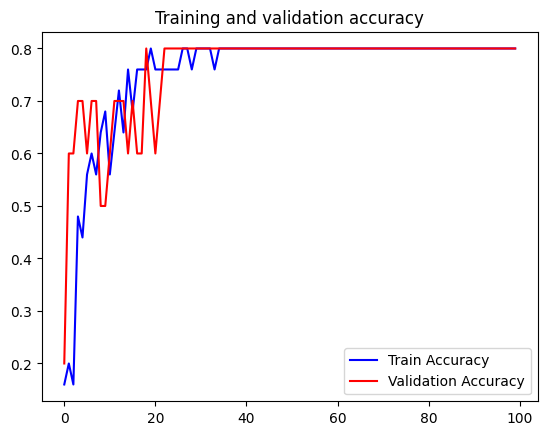

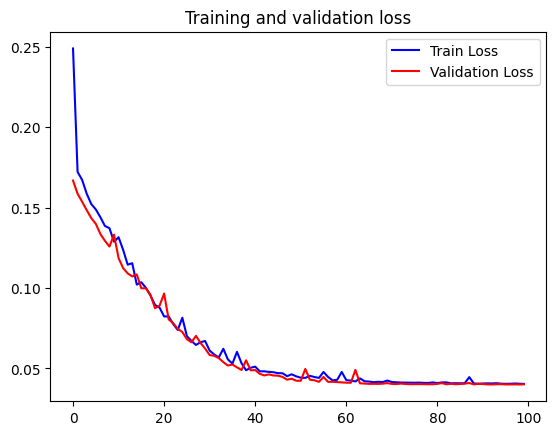

In [38]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, color='b', label='Train Accuracy')
plt.plot(epochs, val_acc, color='r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, color='b', label='Train Loss')
plt.plot(epochs, val_loss, color='r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


## Testing Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Nilai Output Units:
 [[2.328601 0.       0.       0.       0.      ]]


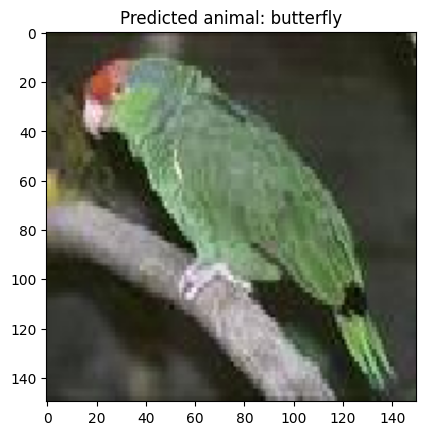

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Nilai Output Units:
 [[2.146197 0.       0.       0.       0.      ]]


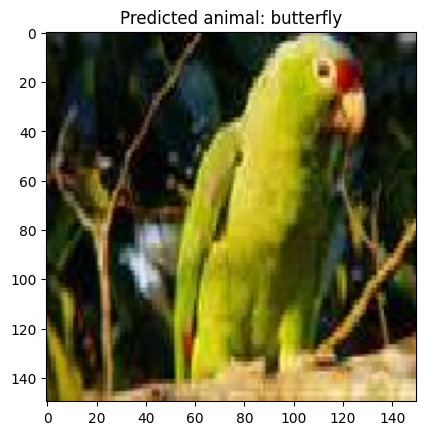

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Nilai Output Units:
 [[0.        0.        0.        2.6784453 0.       ]]


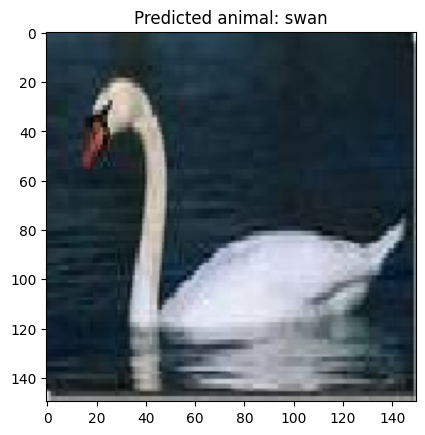

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Nilai Output Units:
 [[0.         2.5060465  0.         0.17454381 0.        ]]


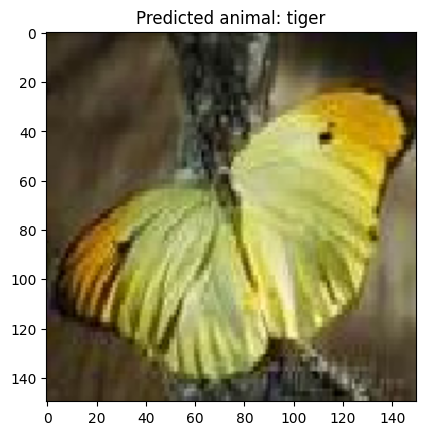

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Nilai Output Units:
 [[0.        0.        1.2127177 0.        0.       ]]


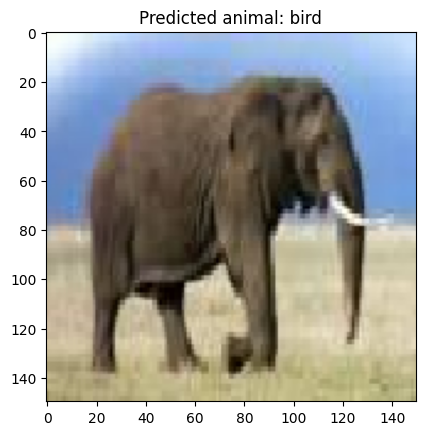

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Nilai Output Units:
 [[0.         0.         1.4293272  0.01912427 0.        ]]


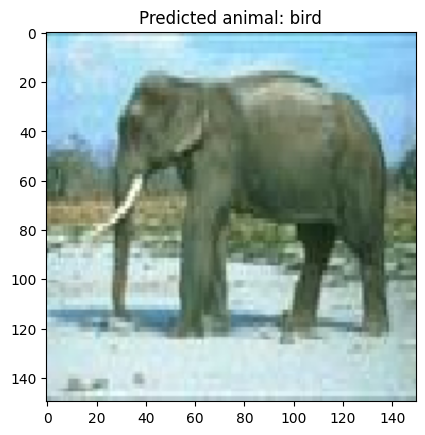

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Nilai Output Units:
 [[0.        0.0754497 0.        2.4909425 0.       ]]


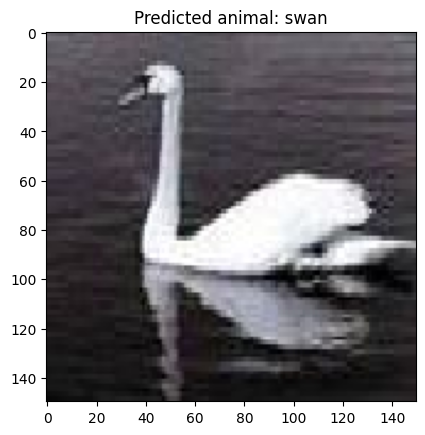

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Nilai Output Units:
 [[0. 0. 0. 0. 0.]]


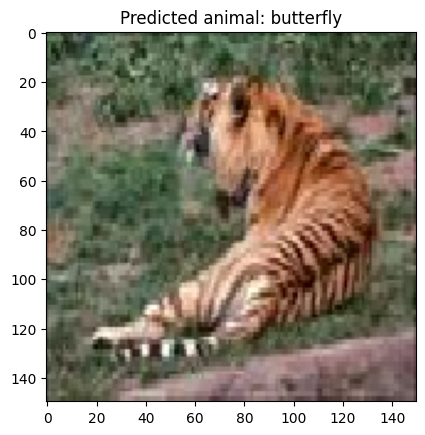

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Nilai Output Units:
 [[0.         2.310224   0.         0.         0.13184261]]


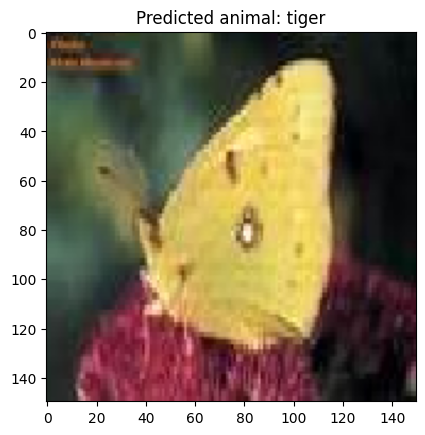

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Nilai Output Units:
 [[0. 0. 0. 0. 0.]]


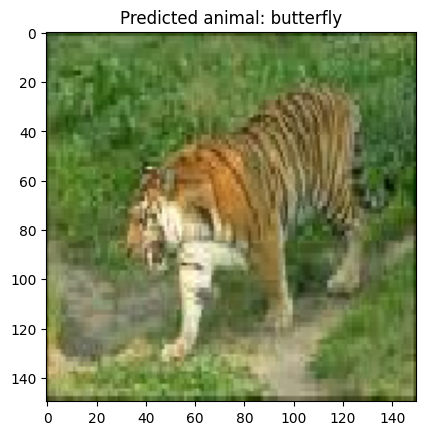

############################################


In [39]:
from keras.preprocessing.image import load_img,img_to_array
import numpy as np
from tensorflow.keras.preprocessing import image

for filename in os.listdir(test_dir):
    # Make sure the file is an image (check for .jpg, .jpeg, .png, etc.)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        img = load_img(f"{test_dir}//{filename}", color_mode="rgb",target_size=(150, 150))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        preds = model.predict(x)
        print("Nilai Output Units:\n", preds)
        index_preds = np.argmax(preds)
        img_print = image.load_img(f"{test_dir}//{filename}", color_mode="rgb",target_size=(150, 150))
        plt.imshow(img_print)
        plt.title(f'Predicted animal: {folders[index_preds]}')
        plt.show()
        print("############################################")